### Segmentação de Clientes

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
dados = pd.read_csv('data/BancoDeDados.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [4]:
dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


### Análise Exploratória

In [5]:
def plot_perc(st,dados):
    plt.figure(figsize = (20, 8))

    g = sns.countplot(x = st, data=dados, orient = 'h')
    g.set_title("Distribuição do estado dos clientes", fontsize = 20)
    g.set_xlabel("Estado", fontsize = 17)
    g.set_ylabel("Contagem", fontsize = 17)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width() / 1.6,
            height + 200,
            '{:1.2f}%'.format(height / 116581 * 100),
            ha = "center", va = 'bottom', fontsize = 12) 
    g.set_ylim(0, max(sizes) * 1.1)

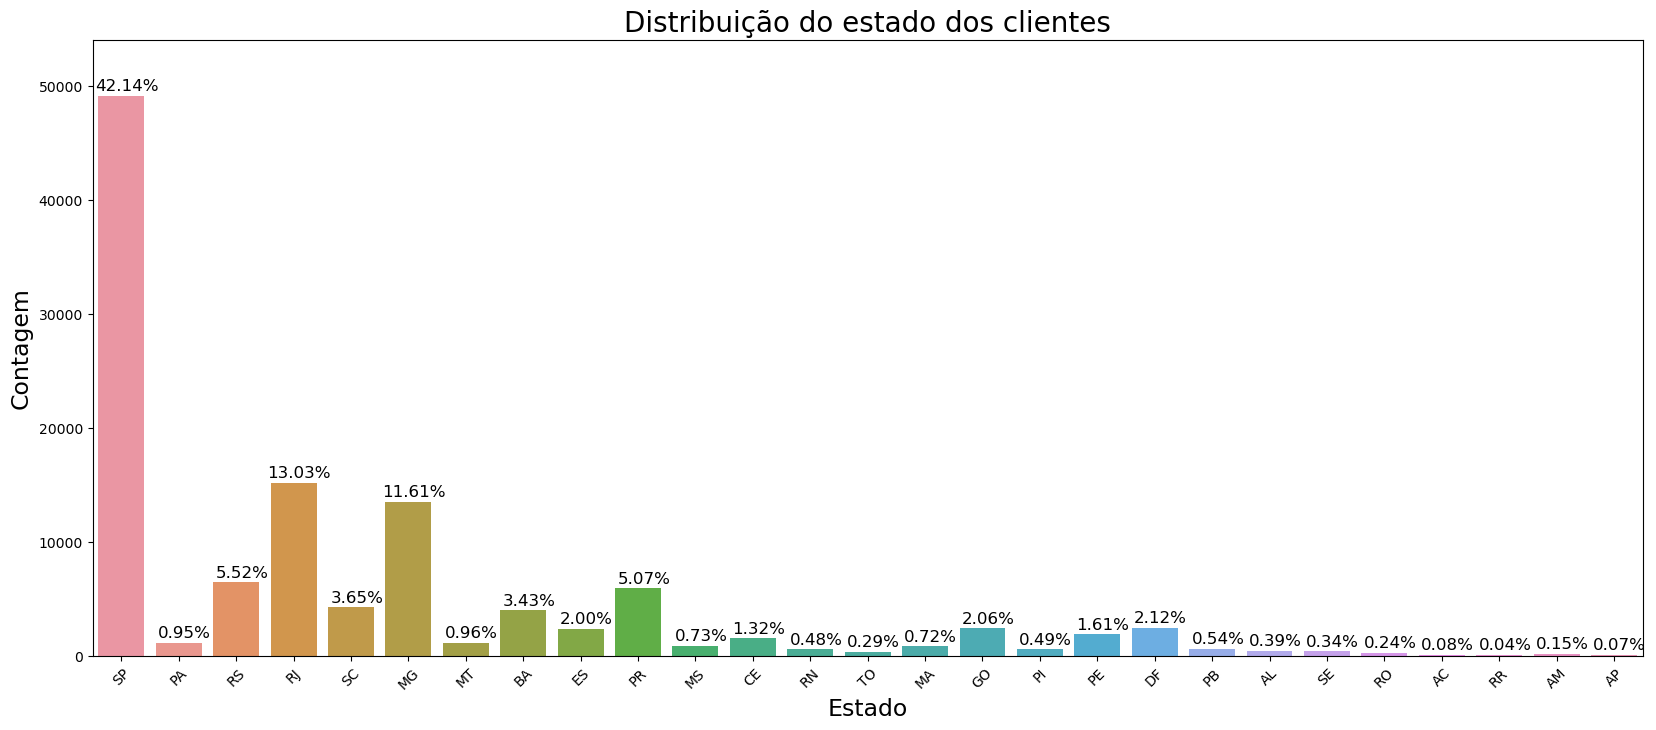

In [6]:
plot_perc('estado_cliente', dados)

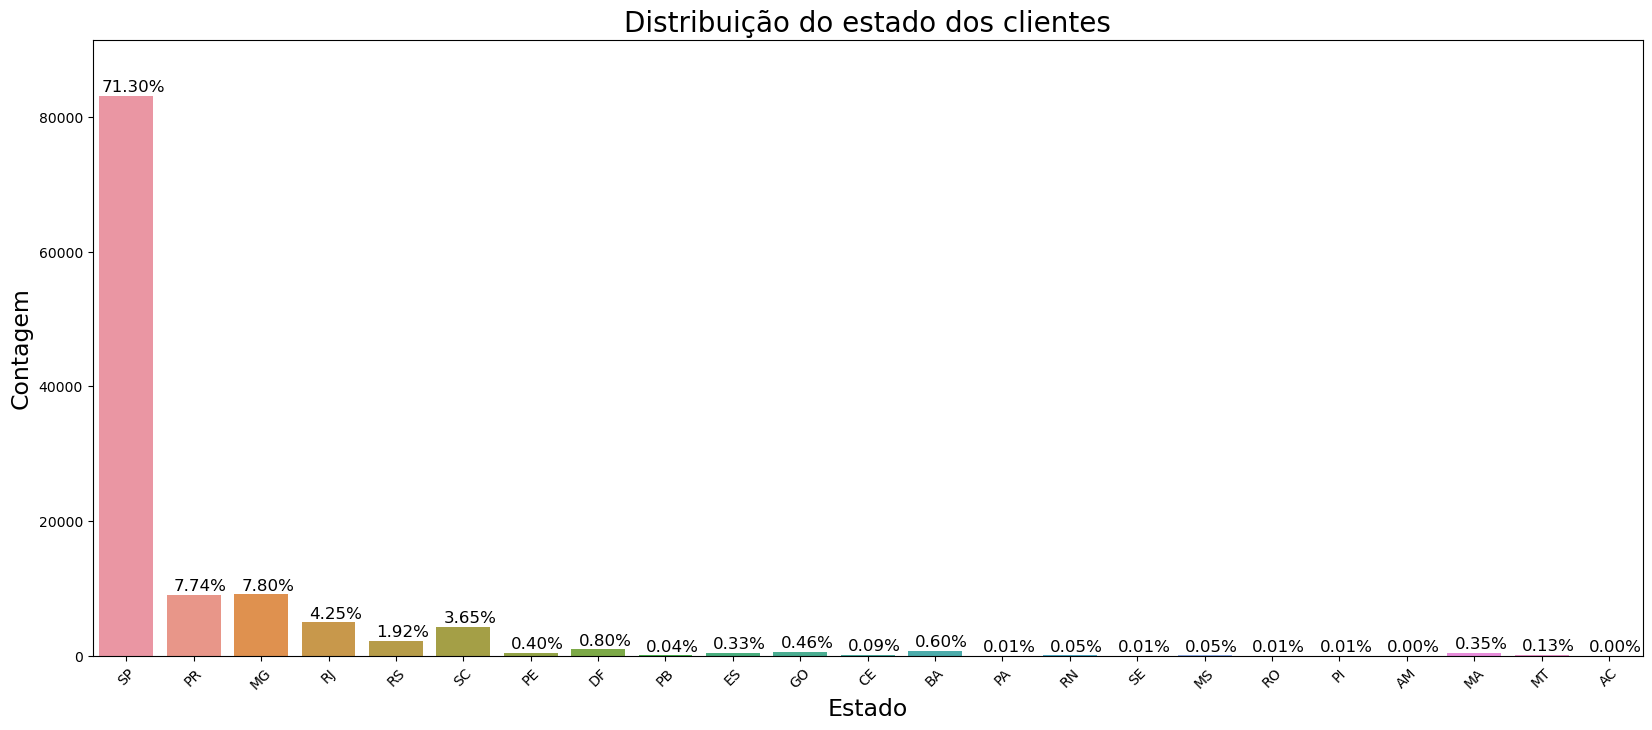

In [7]:
plot_perc('estado_vendedor', dados)

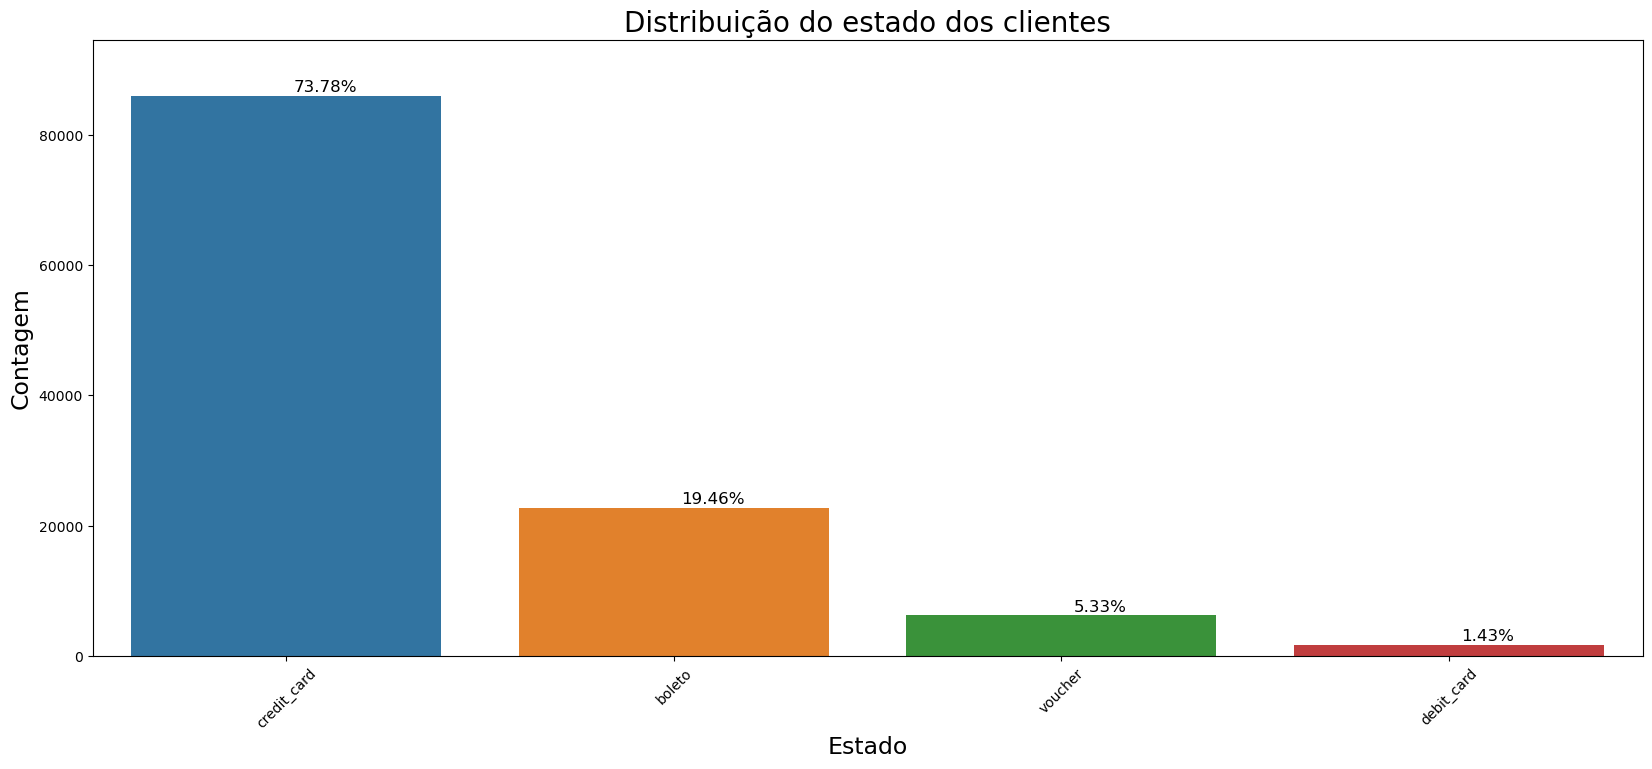

In [8]:
plot_perc('pagamento_tipo', dados)

- Identificamos primeiramente que a maioria dos clientes realiza compras por cartão de crédito, posteriormente por boleto, voucher e cartão de débito. Seria interessante aumentar as promoções para pagamento à vista (para aumento dos pagamentos com boleto ou cartão de débito).
- Também percebe-se que a maioria dos vendedores e compradores estão em SP.

> Agora que temos um banco de dados completo, podemos salva-lo para utilizar posteriormente. Também vou criar um novo banco de dados apenas com as informações que vou precisar para fazer a análise de recẽncia, frequência e receita.

In [9]:
dados_olist = dados[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [10]:
dados_compra = dados.groupby('id_unico_cliente').horario_pedido.max().reset_index()
dados_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

In [11]:
dados_compra['DataMaxCompra']= pd.to_datetime(dados_compra['DataMaxCompra']) 

In [13]:
#seleciona o ponto de observação como a data máxima de compra em nosso df
dados_compra['Recencia'] = (dados_compra['DataMaxCompra'].max() - dados_compra['DataMaxCompra']).dt.days

#junta esse df com o nosso novo chamado df_user
dados_usuario = pd.merge(dados_olist, dados_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')

dados_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [14]:
# plotando a distribuição da feature continua que acabamos de identificar
#def dist(dados):
#    sns.set(palette='muted', color_codes=True, style='white')
#    fig, ax = plt.subplots(figsize=(12, 6))
#    sns.despine(left=True)
#    sns.distplot(dados, bins=30)
#    plt.show()

In [15]:
#dist(dados_usuario['Recencia'])

In [16]:
def calcular_wcss(data):
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data["clusters"] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [17]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans

dados_recencia = dados_usuario[['Recencia']]
soma_quadrados = calcular_wcss(dados_recencia)

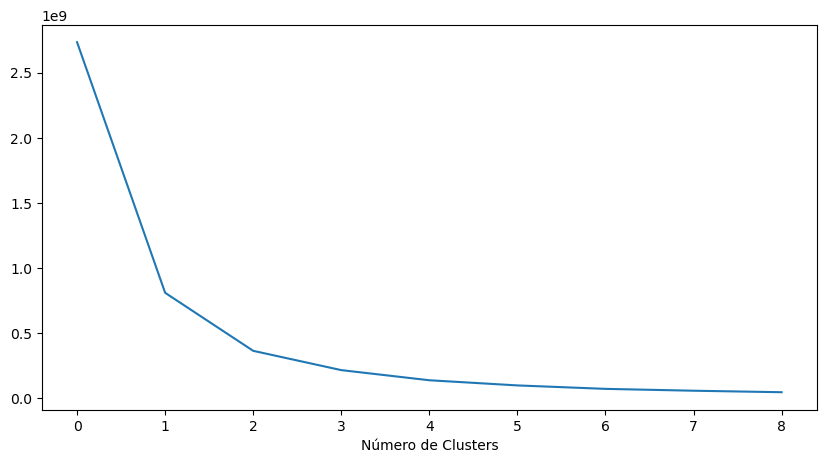

In [18]:
plt.figure(figsize = (10, 5))
plt.plot(soma_quadrados)
plt.xlabel("Número de Clusters")
plt.show()

![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)

In [19]:
import math
def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 2

In [20]:
# calculando a soma dos quadrados para as quantidade de clusters
soma_quadrados = calcular_wcss(dados_recencia)

# calculando a quantidade ótima de clusters
n = numero_otimo_clusters(soma_quadrados)

> E agora o número ideal de clusters!

In [21]:
n

4

In [22]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=4)
dados_usuario['RecenciaCluster'] = kmeans.fit_predict(dados_recencia)

In [23]:
#função para ordenar o número de clusters 
def ordenar_cluster(cluster_nome, target_nome, dados, ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = dados.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = target_nome,
                                                                     ascending = ascending).reset_index(drop = True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(dados, agrupado_por_cluster_ordenado[[cluster_nome,'index']], on = cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome], axis = 1)
    dados_final = removendo_dados.rename(columns = {"index":cluster_nome})
    return dados_final

dados_usuario = ordenar_cluster('RecenciaCluster', 'Recencia', dados_usuario, False)

In [24]:
dados_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0
1,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
2,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


In [25]:
# cria um df com a quantidade de ordens para cada cliente
dados_frequencia = dados.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
dados_frequencia.columns = ['id_unico_cliente', 'Frequencia']

# adiciona esses dados em nosso df principal
dados_usuario = pd.merge(dados_usuario, dados_frequencia, on = 'id_unico_cliente')

In [26]:
dados_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [27]:
# rodando o kmeans para nossa quantidade ótima de clusters
dados_frequencia = dados_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
dados_usuario['FrequenciaCluster'] = kmeans.fit_predict(dados_frequencia)

In [28]:
# ordena os clusters de frequência
dados_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
2,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [29]:
#calcula a receita para cada cliente
dados_receita = dados.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()

#junta com o df principal
dados_usuario = pd.merge(dados_usuario, dados_receita, on='id_unico_cliente')

In [30]:
# rodando o kmeans para nossa quantidade ótima de clusters
dados_pagamento = dados_usuario[['pagamento_valor']]
kmeans = KMeans(n_clusters = 4)
dados_usuario['ReceitaCluster'] = kmeans.fit_predict(dados_pagamento)

In [31]:
#ordena os clusters
dados_usuario.groupby('ReceitaCluster')['pagamento_valor'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114802.0,259.013443,368.216163,9.59,69.9000,132.605,269.2975,2987.84
1,191.0,27358.656911,10032.832924,17069.76,19167.2600,25051.890,30186.0000,45256.00
2,1580.0,5716.421544,2885.844729,2998.56,3615.5275,4564.750,7006.1900,16313.60
3,8.0,109312.640000,0.000000,109312.64,109312.6400,109312.640,109312.6400,109312.64


In [32]:
dados_final = dados_usuario.drop(['id_cliente','horario_pedido','item_id','preco'], axis = 1)
dados_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,pagamento_valor,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [33]:
#renomeando as colunas
dados_final.columns = ['Id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']

In [34]:
dados_final.head()

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [35]:
dados_final = ordenar_cluster('FrequenciaCluster', 'ReceitaCluster', dados_final, False)

> Calcularemos a pontuação geral do cliente baseado nesses clusters e também definimos 4 opções: inativo, business, master e premium. 

In [36]:
dados_final['Pontuacao'] = dados_usuario['RecenciaCluster'] + dados_usuario['FrequenciaCluster'] + dados_usuario['ReceitaCluster']
dados_final.groupby('Pontuacao')['Recencia', 'Frequencia', 'Receita'].mean()
dados_final.head()

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,Receita,ReceitaCluster,FrequenciaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,146.87,0,2,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,140.61,0,2,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,142.05,0,2,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,155.70,0,2,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,148.33,0,2,0


In [37]:
dados_final['Segmento'] = 'Inativo'

In [39]:
dados_final.loc[dados_final['Pontuacao'] >= 3, 'Segmento'] = 'Business' 
dados_final.loc[dados_final['Pontuacao'] >= 6, 'Segmento'] = 'Master' 
dados_final.loc[dados_final['Pontuacao'] >= 8, 'Segmento'] = 'Premium' 

In [40]:
dados_final.to_csv('data/RFM.csv')

In [41]:
def plot_segmento(x,y,data):
    sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
    fig, axs = plt.subplots(1, 1, figsize = (7, 5))
    sns.despine(left = True)
    sns.scatterplot(x = x, y = y, hue = 'Segmento', data = data, size = 'Segmento', 
                    sizes = (50, 150), size_order = ['Premium','Master','Business','Inativo'])
    axs.set_title('Segmento de Cliente')
    plt.show()

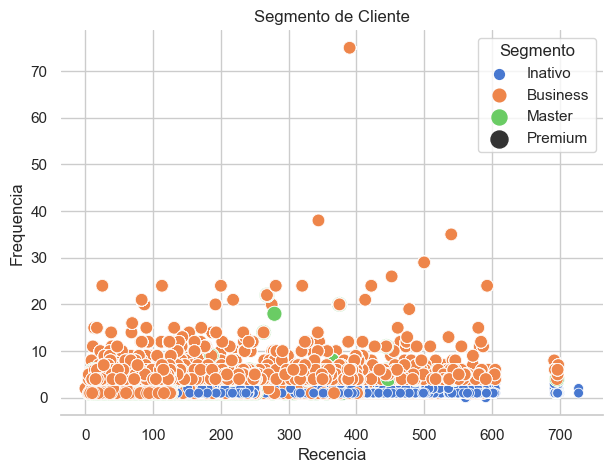

In [42]:
plot_segmento('Recencia', 'Frequencia', dados_final)

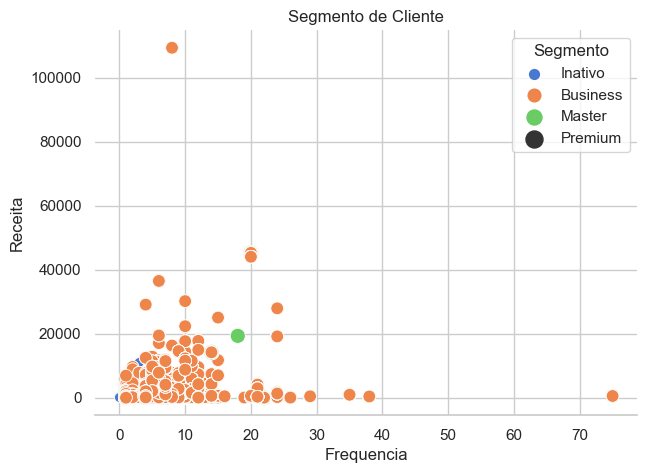

In [43]:
plot_segmento('Frequencia', 'Receita', dados_final)

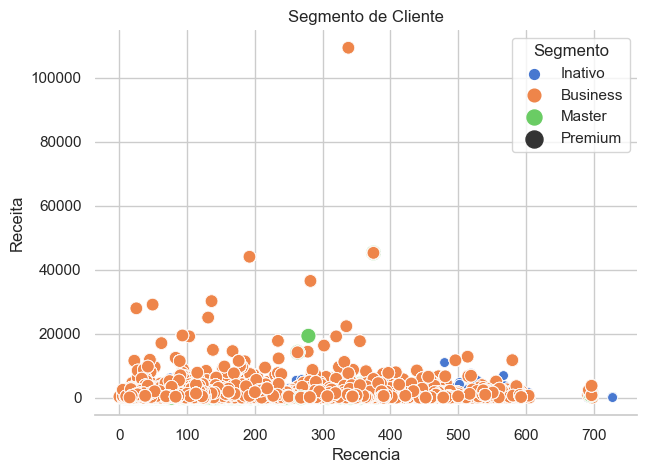

In [44]:
plot_segmento('Recencia', 'Receita', dados_final)

<AxesSubplot:xlabel='Segmento', ylabel='count'>

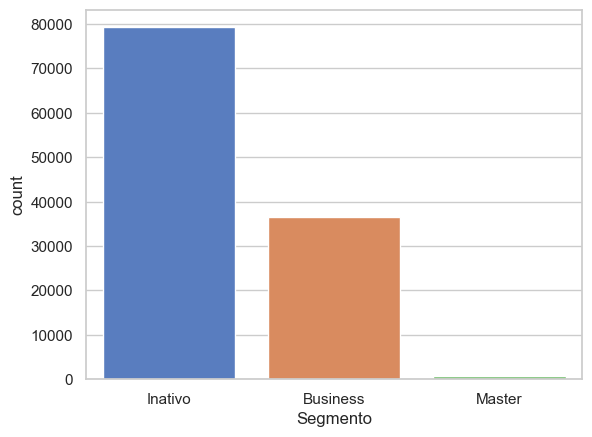

In [45]:
sns.countplot(dados_final['Segmento'])

_